In [8]:
!pip install opendatasets

In [9]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/kartik2112/fraud-detection")

Skipping, found downloaded files in "./fraud-detection" (use force=True to force download)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [12]:
train_df = pd.read_csv('/content/fraud-detection/fraudTrain.csv')
test_df = pd.read_csv('/content/fraud-detection/fraudTest.csv')


In [13]:
df = pd.concat([train_df, test_df], ignore_index=True)


In [14]:
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (1852394, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [15]:
df.drop(columns=[
    'Unnamed: 0', 'trans_date_trans_time', 'merchant', 'category',
    'first', 'last', 'street', 'city', 'state', 'job', 'dob', 'unix_time'
], inplace=True)

df['gender'] = df['gender'].map({'M': 0, 'F': 1})

df['is_fraud'] = df['is_fraud'].astype(int)

print("Missing values:\n", df.isnull().sum())


Missing values:
 cc_num        0
amt           0
gender        0
zip           0
lat           0
long          0
city_pop      0
trans_num     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64


In [17]:
print("Non-numeric columns:")
print(df.select_dtypes(include=['object']).columns)

df.drop(columns=['trans_num', 'cc_num'], inplace=True)
df['gender'] = df['gender'].map({'M': 0, 'F': 1})


Non-numeric columns:
Index(['trans_num'], dtype='object')


In [20]:
print("Missing values before scaling:\n", X.isnull().sum())

X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Missing values before scaling:
 amt                 0
gender        1852394
zip                 0
lat                 0
long                0
city_pop            0
merch_lat           0
merch_long          0
dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [21]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [25]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("🔹 Decision Tree Report")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


🔹 Decision Tree Report
[[367210   1339]
 [  1309    621]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.32      0.32      0.32      1930

    accuracy                           0.99    370479
   macro avg       0.66      0.66      0.66    370479
weighted avg       0.99      0.99      0.99    370479



In [26]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9928524963628168


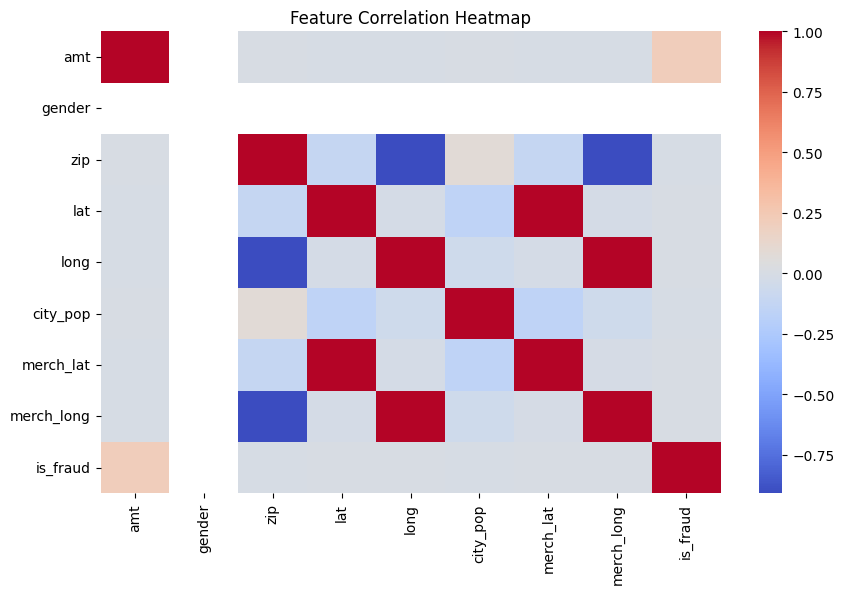

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()
